多变量分类

In [136]:
from sklearn.datasets import load_iris
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
# 使用sklearn调用衡量线性回归的MSE 、 RMSE、 MAE、r2
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np

In [137]:
data_1 = pd.read_excel('./train.xlsx', index_col=0)
data_2 = pd.read_excel('./valid.xlsx', index_col=0)

In [138]:
data_1.head()

,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,...,feat12,feat13,feat14,feat15,feat16,feat17,feat18,feat19,feat20,price
id,,,,,,,,,,,,,,,,,,,,,
1,1512,0,0.6,1,1,1,54,0.4,134,3,...,220,1838,3366,7,3,11,1,0,1,3
2,614,0,2.9,1,3,1,24,0.2,94,4,...,409,603,1930,13,12,4,1,0,1,1
3,553,0,0.5,1,2,1,23,0.5,119,3,...,993,1517,2981,7,3,14,1,0,0,2
4,718,0,0.7,1,0,1,21,0.8,88,1,...,518,830,1754,17,11,9,1,0,1,1
5,1166,0,1.5,1,0,1,43,0.8,80,4,...,205,603,3993,7,1,7,1,1,0,3


In [139]:
df = pd.concat([data_1, data_2])

In [140]:
df

,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,...,feat12,feat13,feat14,feat15,feat16,feat17,feat18,feat19,feat20,price
id,,,,,,,,,,,,,,,,,,,,,
1,1512,0,0.6,1,1,1,54,0.4,134,3,...,220,1838,3366,7,3,11,1,0,1,3
2,614,0,2.9,1,3,1,24,0.2,94,4,...,409,603,1930,13,12,4,1,0,1,1
3,553,0,0.5,1,2,1,23,0.5,119,3,...,993,1517,2981,7,3,14,1,0,0,2
4,718,0,0.7,1,0,1,21,0.8,88,1,...,518,830,1754,17,11,9,1,0,1,1
5,1166,0,1.5,1,0,1,43,0.8,80,4,...,205,603,3993,7,1,7,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,1661,0,1.9,1,5,0,23,1.0,172,5,...,846,1634,2676,12,6,11,0,1,1,3
1497,833,1,2.2,0,4,0,27,0.9,124,1,...,359,1395,2150,9,5,7,0,1,1,1
1498,1397,0,2.9,1,13,0,9,0.5,87,6,...,1308,1991,3137,12,1,11,1,1,1,3


In [141]:
labels = df['price']

In [142]:
data = df.drop('price', axis=1)

In [143]:
data

,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,feat11,feat12,feat13,feat14,feat15,feat16,feat17,feat18,feat19,feat20
id,,,,,,,,,,,,,,,,,,,,
1,1512,0,0.6,1,1,1,54,0.4,134,3,2,220,1838,3366,7,3,11,1,0,1
2,614,0,2.9,1,3,1,24,0.2,94,4,7,409,603,1930,13,12,4,1,0,1
3,553,0,0.5,1,2,1,23,0.5,119,3,3,993,1517,2981,7,3,14,1,0,0
4,718,0,0.7,1,0,1,21,0.8,88,1,7,518,830,1754,17,11,9,1,0,1
5,1166,0,1.5,1,0,1,43,0.8,80,4,1,205,603,3993,7,1,7,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,1661,0,1.9,1,5,0,23,1.0,172,5,10,846,1634,2676,12,6,11,0,1,1
1497,833,1,2.2,0,4,0,27,0.9,124,1,6,359,1395,2150,9,5,7,0,1,1
1498,1397,0,2.9,1,13,0,9,0.5,87,6,18,1308,1991,3137,12,1,11,1,1,1


In [144]:
# data = data.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
# data = data.apply(lambda x:(x-x.mean())/x.std())


In [145]:
labels_np = labels.to_numpy()

In [146]:
data_np = data.to_numpy()

In [147]:
X_train, X_test, y_train, y_test = train_test_split(data_np, labels_np, test_size=0.3, random_state=1234565)

params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',
    'num_class': 4,
    'gamma': 0.1,
    'max_depth': 8,
    'lambda': 2,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'min_child_weight': 3,
    'eta': 0.1,
    'seed': 1000,
    'nthread': 4,
}

Accuracy: 92.00 % 


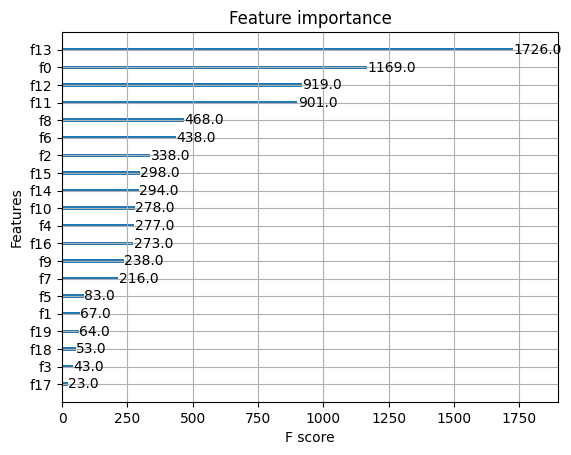

In [148]:
dtrain = xgb.DMatrix(X_train, y_train)
num_rounds = 500
model = xgb.train(list(params.items()), dtrain, num_rounds)

# 对测试集进行预测
dtest = xgb.DMatrix(X_test)
ans = model.predict(dtest)

# 计算准确率
cnt1 = 0
cnt2 = 0
for i in range(len(y_test)):
    if ans[i] == y_test[i]:
        cnt1 += 1
    else:
        cnt2 += 1

print("Accuracy: %.2f %% " % (100 * cnt1 / (cnt1 + cnt2)))

# 显示重要特征
plot_importance(model)
plt.show()